Problem statement:

A student from a certain University was asked to prepare a dataset and build a prediction model for predicting SAT scores based on the exam giver’s GPA.

Business objective: To find SAT score based on GPA.
 

Data:We have two columns in our dataset, SAT Score and GPA.The data used for this analysis contains information on 200 records of Years experience and salary.

At first,we need to understand the data and hence we load the same and the libraries required.

In [ ]:

# Importing necessary libraries
import pandas as pd # deals with data frame                     # for Data Manipulation\n",
import numpy as np  # deals with numerical values              # for Mathematical calculations\n",

wcat = pd.read_csv("D:/7 data mining/supervised/linear regresstion/assignment/SAT_GPA.csv")

wcat.describe()
Out[140]: 
             SATS         GPA
count  200.000000  200.000000
mean   491.810000    2.849500
std    174.893834    0.541076
min    202.000000    2.000000
25%    349.750000    2.400000
50%    480.500000    2.800000
75%    641.500000    3.400000
max    797.000000    3.900000

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = wcat.GPA, x = np.arange(1, 200, 1))
plt.hist(wcat.GPA) #histogram
plt.boxplot(wcat.GPA) #boxplot

plt.bar(height = wcat.SATS, x = np.arange(1, 200, 1))
plt.hist(wcat.SATS) #histogram
plt.boxplot(wcat.SATS) #boxplot

# Scatter plot
plt.scatter(x = wcat['SATS'], y = wcat['GPA'], color = 'green') 


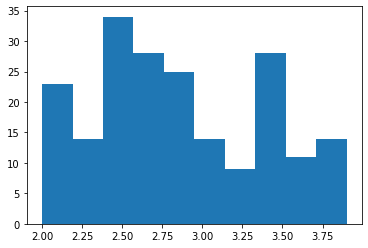

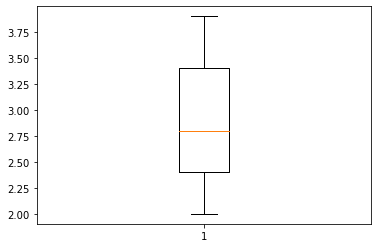

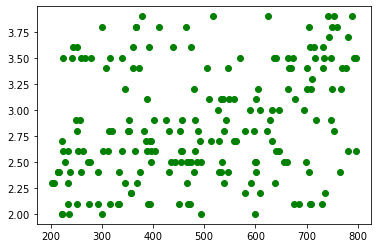

In [ ]:
# correlation

np.corrcoef(wcat.SATS, wcat.GPA) 
Out[153]: 
array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

cov_output = np.cov(wcat.SATS, wcat.GPA)[0, 1]

cov_output
Out[155]: 27.777793969849252

# wcat.cov()

# Import library

import statsmodels.formula.api as smf

# Simple Linear Regression

model = smf.ols('GPA ~ SATS', data = wcat).fit()

model.summary()
Out[161]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           2.46e-05
Time:                        19:26:19   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SATS           0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

pred1 = model.predict(pd.DataFrame(wcat['SATS']))

# Regression Line
plt.scatter(wcat.SATS, wcat.GPA)
plt.plot(wcat.SATS, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.SATSow()

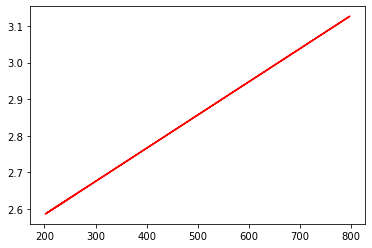

In [ ]:
# Error calculation

res1 = wcat.GPA - pred1

res_sqr1 = res1 * res1

mse1 = np.mean(res_sqr1)

rmse1 = np.sqrt(mse1)

rmse1
Out[173]: 0.5159457227723684

######### Model building on Transformed Data

# Log Transformation

# x = log(waist); y = at

plt.scatter(x = np.log(wcat['SATS']), y = wcat['GPA'], color = 'brown')
Out[177]: <matplotlib.collections.PathCollection at 0x1e06d5f31f0>

np.corrcoef(np.log(wcat.SATS), wcat.GPA) #correlation
Out[178]: 
array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

model2 = smf.ols('CR ~ np.log(SATS)', data = wcat).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(wcat['SATS']))

# Regression Line
plt.scatter(np.log(wcat.SATS), wcat.GPA)
plt.plot(np.log(wcat.SATS), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.SATSow()

# Error calculation
res2 = wcat.GPA - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['SATS'], y = np.log(wcat['GPA']), color = 'orange')
np.corrcoef(wcat.SATS, np.log(wcat.GPA)) #correlation

model3 = smf.ols('np.log(GPA) ~ SATS', data = wcat).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(wcat['SATS']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(wcat.SATS, np.log(wcat.CR))
plt.plot(wcat.SATS, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.SATSow()

# Error calculation
res3 = wcat.GPA - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3


#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(CR) ~ SATS + I(DT*DT)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(wcat.SATS, np.log(wcat.GPA))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.SATSow()


# Error calculation
res4 = wcat.GPA - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(GPA) ~ SATS + I(SATS*SATS)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_CR = np.exp(test_pred)
pred_test_CR

# Model Evaluation on Test data
test_res = test.GPA - pred_test_GPA
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_GPA = np.exp(train_pred)
pred_train_GPA

# Model Evaluation on train data
train_res = train.GPA- pred_train_GPA
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse


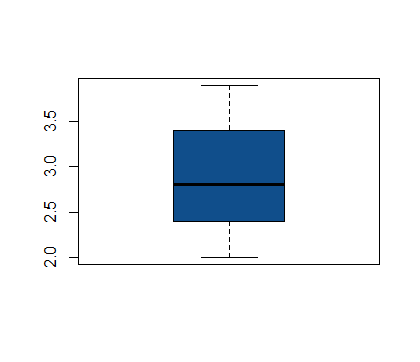

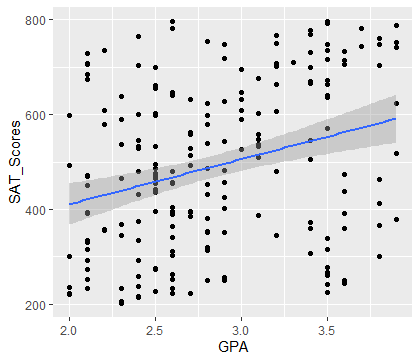

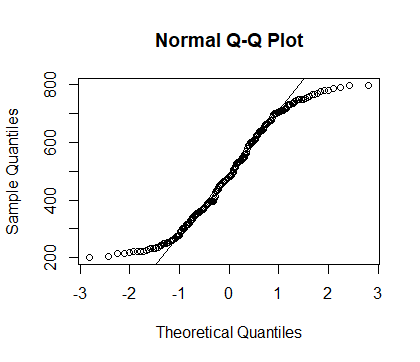

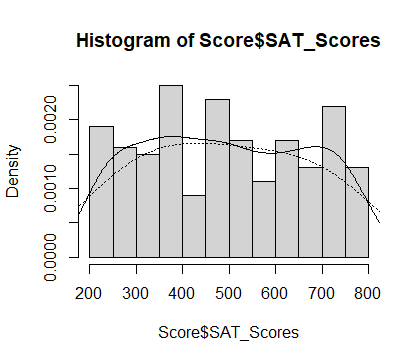